# Model: Decision Tree

## 1. Theory Background

### 1.1 The Decision Tree Algorithm  

The decision tree algorithm is a popular and widely used machine learning algorithm used for both classification and regression tasks. It works by constructing a tree-like model of decisions and their possible consequences. The tree consists of nodes that represent decisions or features, edges that represent the decision rules or conditions, and leaves that represent the outcome or class labels.

The decision tree algorithm works by recursively splitting the dataset into smaller and smaller subsets based on the values of the input features, until a stopping criterion is reached. The goal is to create a tree that can accurately predict the class or value of new, unseen instances.

The decision tree algorithm is easy to understand and interpret, making it useful for both exploratory data analysis and predictive modeling. It can handle both categorical and numerical data, as well as missing data. However, it can suffer from overfitting if the tree is too deep or the stopping criterion is not well-defined.


### 1.2 Advantages of Decision Tree
The decision tree has a great advantage of being capable of handling both numerical and categorical variables. Many other modelling techniques can handle only one kind of variable.  

The decision tree model validation can be done through statistical tests and the reliability can be established easily.  

As it is a white box model, so the logic behind it is visible to us and we can easily interpret the result unlike the black-box model like an artificial neural network.

------------------------------------------------------------------------

## 2. Import necessary Libraries

In [37]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, auc

------------------------------------------------------------------------

## 3. Demonstrate dataset content

In [38]:
rawData = pd.read_csv("./Data/Final_Data.csv")
rawData.drop(columns=rawData.columns[0], axis=1, inplace=True) # remove unnamed col
rawData.head()

,Hypertension,Diabetes,Overall Health,BMI Category,Have CHD/MI,High Cholesterol,Income
0,No,No,Fair or poor health,Underweight,No,Yes,25000 to < 35000
1,Yes,Yes,Good or better health,Overweight,Yes,No,15000 to < 25000
2,Yes,Yes,Good or better health,Obese,No,Yes,50000 to < 100000
3,No,Yes,Fair or poor health,Overweight,Yes,Yes,15000 to < 25000
4,No,No,Good or better health,Normal,No,No,35000 to < 50000


------------------------------------------------------------------------

## 4. Prepare Dataset

### 4.1 Select variables

Based on the EDA result, we have the below selected variables to be used
1. `Diabetes`
2. `Overall Health`
3. `BMI Category`
4. `Have CHD/MI`
5. `High Cholesterol`
6. `Income`


And the dependent variable, or target variable will be：`Hypertension`

In [39]:
hypertension_dataset = rawData.copy()
hypertension_dataset.head()

,Hypertension,Diabetes,Overall Health,BMI Category,Have CHD/MI,High Cholesterol,Income
0,No,No,Fair or poor health,Underweight,No,Yes,25000 to < 35000
1,Yes,Yes,Good or better health,Overweight,Yes,No,15000 to < 25000
2,Yes,Yes,Good or better health,Obese,No,Yes,50000 to < 100000
3,No,Yes,Fair or poor health,Overweight,Yes,Yes,15000 to < 25000
4,No,No,Good or better health,Normal,No,No,35000 to < 50000


### 4.2 Encode categorical variables   

As you can see from the dataset above, it included categorical variables such as `Yes` and `No`. Such categorical results cannot be fit in the Decision Tree Classification model , as the model requires Numeric data instead of String data

Therefore, for the categorical variables with a string value, we translated those value to numeric ones, namely Yes = 1, No = 0.  

In [40]:
hypertension_dataset.replace("Yes", 1, inplace = True)
hypertension_dataset.replace("No", 0, inplace = True)

And for other variables, we encoded it as necessary

In [41]:
#Encode Overall Health	
hypertension_dataset.replace("Fair or poor health", 0, inplace = True)
hypertension_dataset.replace("Good or better health",1, inplace = True)

#Encode Income
hypertension_dataset.replace("< 15000", 1, inplace = True)
hypertension_dataset.replace("15000 to < 25000",2, inplace = True)
hypertension_dataset.replace("25000 to < 35000",3, inplace = True)
hypertension_dataset.replace("35000 to < 50000",4, inplace = True)
hypertension_dataset.replace("35000 to < 50000",5, inplace = True)
hypertension_dataset.replace("50000 to < 100000",6, inplace = True)
hypertension_dataset.replace("100000 to < 200000",7, inplace = True)
hypertension_dataset.replace("> 200000",8, inplace = True)

#Encode BMI Category
hypertension_dataset.replace("Underweight",1, inplace = True)
hypertension_dataset.replace("Normal",2, inplace = True)
hypertension_dataset.replace("Overweight",3, inplace = True)
hypertension_dataset.replace("Obese",4, inplace = True)


In [42]:
# Sanity check
hypertension_dataset.head()

,Hypertension,Diabetes,Overall Health,BMI Category,Have CHD/MI,High Cholesterol,Income
0,0,0,0,1,0,1,3
1,1,1,1,3,1,0,2
2,1,1,1,4,0,1,6
3,0,1,0,3,1,1,2
4,0,0,1,2,0,0,4


-------------------------------------

### 4.3 Ready for next step  


Now, the dataset is all set for the next step: fitting in the Decision Tree Model, with 186,125 non-null values.

In [43]:
hypertension_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186125 entries, 0 to 186124
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Hypertension      186125 non-null  int64
 1   Diabetes          186125 non-null  int64
 2   Overall Health    186125 non-null  int64
 3   BMI Category      186125 non-null  int64
 4   Have CHD/MI       186125 non-null  int64
 5   High Cholesterol  186125 non-null  int64
 6   Income            186125 non-null  int64
dtypes: int64(7)
memory usage: 9.9 MB


-------------------------------------

## 5. The Decision Tree Model

### 5.1 Seperate feature variables and target variable 

In this step, feature variables are merged into X, and target variable is Y.

In [44]:
# split dataset to features and target variable

# Feature variab;es 
feature_cols = hypertension_dataset.columns.values.tolist()
feature_cols.remove('Hypertension')
print("Features:" , feature_cols)


# Target Variable
label = ['Hypertension']

X = hypertension_dataset[feature_cols] # Features
y = hypertension_dataset[label] # Target variable

Features: ['Diabetes', 'Overall Health', 'BMI Category', 'Have CHD/MI', 'High Cholesterol', 'Income']


### 5.2 Split to Train and Test set  

To understand the model performance and to determine accuracy, we randomly split the X and Y dataset into Train and Test dataset by 80%-20% portion, producing X_train, X_test and y_train, y_test.

In [45]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9999) # 80% training and 20% Test

### 5.3 Create a Decision Tree Model using Scikit-learn  

To do the classification, we have imported the DecisionTreeClassifier() from sklearn. This special classifier is capable of classifying binary variable as well as multiclass variables.  

The following code first fits the decision tree classifier clf to the training datasets: X_train and y_train. This means that the decision tree is trained to make predictions based on the feature values in X_train and the corresponding target values in y_train.   

Next, we use the trained decision tree classifier clf to predict the target values for the test data X_test. The predicted values are stored in the variable y_pred.

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### 5.4 Evaluating Accuracy  

`metrics.accuracy_score` is a function from the sklearn.metrics module that computes the accuracy score of a classification model. <br>

It takes two arguments:
1. y_test
2. y_pred

y_test is the true target values for the test set, and y_pred is the predicted target values generated by the decision tree classifier. It returns a floating-point number between 0 and 1, where 1 represents perfect accuracy and 0 represents the worst possible accuracy.

In [47]:
#Checking model accuracy
First_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", First_accuracy)


Accuracy:  0.7001208865010073


### 5.5 Determining TPR/FPR

Another improtant indicators for the accuracy of the model are True Positive Rate (TPR) and False Positive Rate (FPR), calculated from the Confusion Matrix.  

TPR is the number of correctly predicted positive cases out of the total number of positive cases. <br>FPR is the number of incorrectly predicted positive cases out of the total number of negative cases.

Confusion matrix

 [[17593  4284]
 [ 6879  8469]]


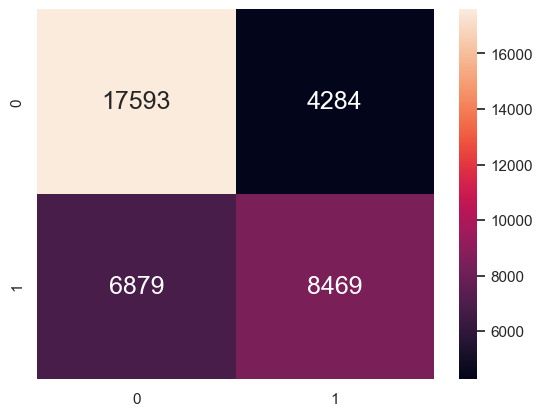


Goodness of Fit of Model 	Test Dataset
True Positive Rate		:0.5517982799061767
False Positive Rate		:0.1958220962654843


In [48]:
from sklearn.metrics import confusion_matrix
#create confusion matrix
cm = confusion_matrix(y_test, y_pred)

#print confusion matrix and heatmap
print('Confusion matrix\n\n', cm)

sb.heatmap(cm,annot = True,fmt=".0f", annot_kws={"size": 18})
plt.show()

#TPR = TP/(TP+FN)
#FPR = FP/(FP+TN)
#Helper funct to print TPR and FPR
def classification_error(y_test,y_pred):
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

[First_TPR1_test, First_FPR1_test] = classification_error(y_test, y_pred)

First_TPR = [First_TPR1_test, First_FPR1_test][0]
First_FPR  = [First_TPR1_test, First_FPR1_test][1]
# Print Classification Accuracy, True Positive Rate, False Positive Rate 
# Check the Goodness of Fit 
print()
print("Goodness of Fit of Model \tTest Dataset")
print("True Positive Rate\t\t:{}".format(First_TPR))
print("False Positive Rate\t\t:{}".format(First_FPR))

### 5.6 Visualizing Decision Trees

Model accuracy score with criterion entropy: 0.7001


[Text(0.5222068914081146, 0.9642857142857143, 'x[4] <= 0.5\ngini = 0.484\nsamples = 148900\nvalue = [87645, 61255]'),
 Text(0.2849452158819701, 0.8928571428571429, 'x[0] <= 0.5\ngini = 0.417\nsamples = 89088\nvalue = [62658, 26430]'),
 Text(0.17000705142113257, 0.8214285714285714, 'x[2] <= 3.5\ngini = 0.39\nsamples = 81065\nvalue = [59557, 21508]'),
 Text(0.10807658928183987, 0.75, 'x[3] <= 0.5\ngini = 0.342\nsamples = 57430\nvalue = [44875, 12555]'),
 Text(0.05923193751356043, 0.6785714285714286, 'x[2] <= 2.5\ngini = 0.329\nsamples = 55332\nvalue = [43839, 11493]'),
 Text(0.0351486222607941, 0.6071428571428571, 'x[1] <= 0.5\ngini = 0.27\nsamples = 27131\nvalue = [22766, 4365]'),
 Text(0.018008244738555, 0.5357142857142857, 'x[5] <= 5.0\ngini = 0.418\nsamples = 2068\nvalue = [1453, 615]'),
 Text(0.008244738555001085, 0.4642857142857143, 'x[5] <= 1.5\ngini = 0.435\nsamples = 1384\nvalue = [941, 443]'),
 Text(0.003471468865263615, 0.39285714285714285, 'x[2] <= 1.5\ngini = 0.413\nsamples 

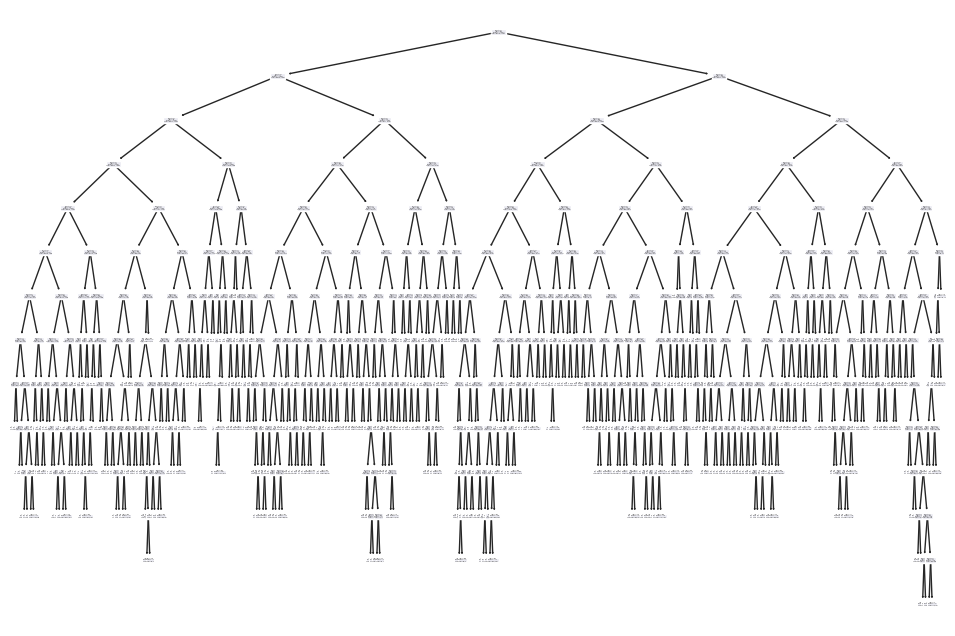

In [49]:
# from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(First_accuracy))
y_pred = clf.predict(X_train)
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))

### 5.7 Optimizing Decision Tree Performance    

#### 5.7.1 What can be improved

Criterion : (default=”gini”) This parameter allows us to use the different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

    `Upon testing, we have decided to continue with the gini model`

Max_depth : Maximum Depth of a Tree. If no specified, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting. Thus, we need to find the best Max_depth for the model to maximise prediction accuracy yet minimise overfitting of the data.


#### 5.7.2 Determining max depth

Different Depths are tried on the Decision Tree model to `find peak of the ROC curve`(largest area), helping us identify the `optimal Max_depth` that gives the `highest Accuracy and best trade-off between FPR and TPR`

Trying depths from 1 to 13, the ROC area peaks at depth 9 before dropping and increasing, indicating that Max_depth 9 may be the best fit.

depth: 1	ROC:0.64391
depth: 2	ROC:0.68701
depth: 3	ROC:0.71296


depth: 4	ROC:0.728
depth: 5	ROC:0.7369
depth: 6	ROC:0.74354
depth: 7	ROC:0.74636
depth: 8	ROC:0.74797
depth: 9	ROC:0.74805
depth: 10	ROC:0.74803
depth: 11	ROC:0.74803
depth: 12	ROC:0.74805
depth: 13	ROC:0.74805


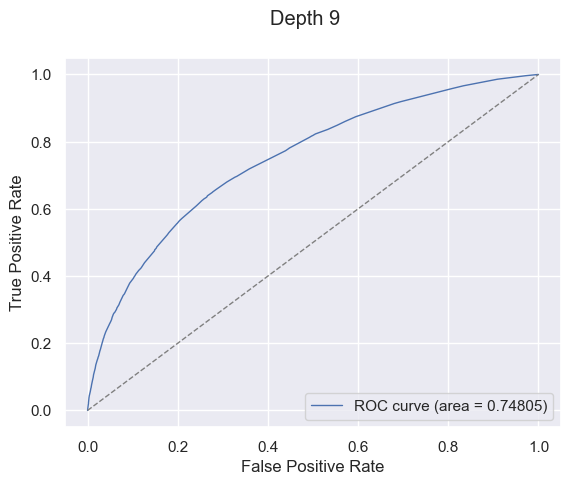

In [50]:
def Find_ROC(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    return roc_auc

    
from sklearn.tree import DecisionTreeClassifier

max_depths = range(1, 14)

for depth in max_depths:
    clf = DecisionTreeClassifier(criterion="gini",max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    x = round(Find_ROC(y_test, y_pred_prob), 5) 
    print("depth: {}\tROC:{}".format(depth, x))


clf = DecisionTreeClassifier(criterion="gini",max_depth=9)
clf.fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test)[:, 1]
x = round(Find_ROC(y_test, y_pred_prob), 5) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.5f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.suptitle ('Depth 9')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

--------------------------------------

#### 5.7.3 The Optimised Model
From above, we can see that `depth 9` is the peak ROC curve, giving us the highest accuracy.<br><br>
We now come to our optimised model with the best Max_depth we just found.

As the result shows, the Accuracy of the Optimized Model, as well as the TPF/FPR, are slighty higher than the previous one, which indicates the optimization is successful and we have arrived at a more accurate Decision Tree Model.

Confusion matrix
 [[17601  4276]
 [ 6875  8473]]

Accuracy: 0.7004432505036937
Previous Accuracy: 0.7001208865010073
Improvement:  0.00032236400268637055


Goodness of Fit of Model: 
True Positive Rate		: 0.5520589001824342
False Positive Rate		: 0.1954564154134479
------------------------------------------------------
Previous Goodness of Fit of Model
True Positive Rate:0.5517982799061767
False Positive Rate:0.1958220962654843
------------------------------------------------------
Improvement on the TPR:  0.00026062027625750606
Improvement on the FPR:  0.000365680852036393



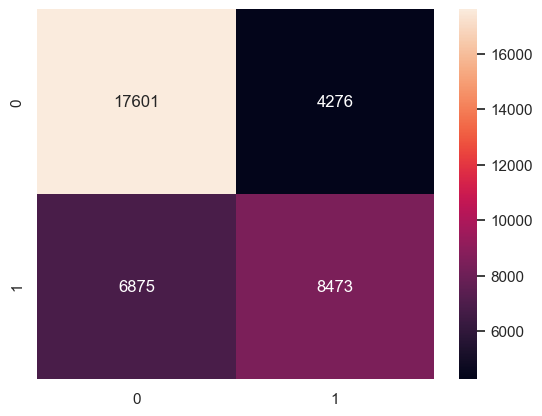

In [51]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=9)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# print(y_pred,"\n")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

# Plot the Confusion Matrix for Train and Test

sb.heatmap(cm,annot = True, fmt=".0f")

# Helper funct done above
[TPROut, FPROut] = classification_error(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
FPR, TPR, thresholds = roc_curve(y_test, y_pred)
# test_AUC = auc(FPR,TPR)
test_AUC =metrics.accuracy_score(y_test, y_pred)
print()
print("Accuracy:",test_AUC)
print("Previous Accuracy: {}".format(First_accuracy))
print("Improvement: ", test_AUC - First_accuracy )
print()


# Print Classification Accuracy, True Positive Rate, False Positive Rate 
# Check the Goodness of Fit 
print()
print("Goodness of Fit of Model: ")
print("True Positive Rate\t\t:", [TPROut, FPROut][0])
print("False Positive Rate\t\t:", [TPROut, FPROut][1])
print("------------------------------------------------------")

print("Previous Goodness of Fit of Model")
print("True Positive Rate:{}".format(First_TPR))
print("False Positive Rate:{}".format(First_FPR))
print("------------------------------------------------------")

print("Improvement on the TPR: ", [TPROut, FPROut][0] - First_TPR)
print("Improvement on the FPR: ", First_FPR - [TPROut, FPROut][1])
print()


-------------------------------------

### 5.8 Visualizing Optimized Decision Trees

[Text(0.5220328282828283, 0.95, 'x[4] <= 0.5\ngini = 0.484\nsamples = 148900\nvalue = [87645, 61255]\nclass = No'),
 Text(0.27831439393939394, 0.85, 'x[0] <= 0.5\ngini = 0.417\nsamples = 89088\nvalue = [62658, 26430]\nclass = No'),
 Text(0.15751262626262627, 0.75, 'x[2] <= 3.5\ngini = 0.39\nsamples = 81065\nvalue = [59557, 21508]\nclass = No'),
 Text(0.0976010101010101, 0.65, 'x[3] <= 0.5\ngini = 0.342\nsamples = 57430\nvalue = [44875, 12555]\nclass = No'),
 Text(0.05555555555555555, 0.55, 'x[2] <= 2.5\ngini = 0.329\nsamples = 55332\nvalue = [43839, 11493]\nclass = No'),
 Text(0.03232323232323232, 0.45, 'x[1] <= 0.5\ngini = 0.27\nsamples = 27131\nvalue = [22766, 4365]\nclass = No'),
 Text(0.01616161616161616, 0.35, 'x[5] <= 5.0\ngini = 0.418\nsamples = 2068\nvalue = [1453, 615]\nclass = No'),
 Text(0.00808080808080808, 0.25, 'x[5] <= 1.5\ngini = 0.435\nsamples = 1384\nvalue = [941, 443]\nclass = No'),
 Text(0.00404040404040404, 0.15, 'x[2] <= 1.5\ngini = 0.413\nsamples = 329\nvalue = [

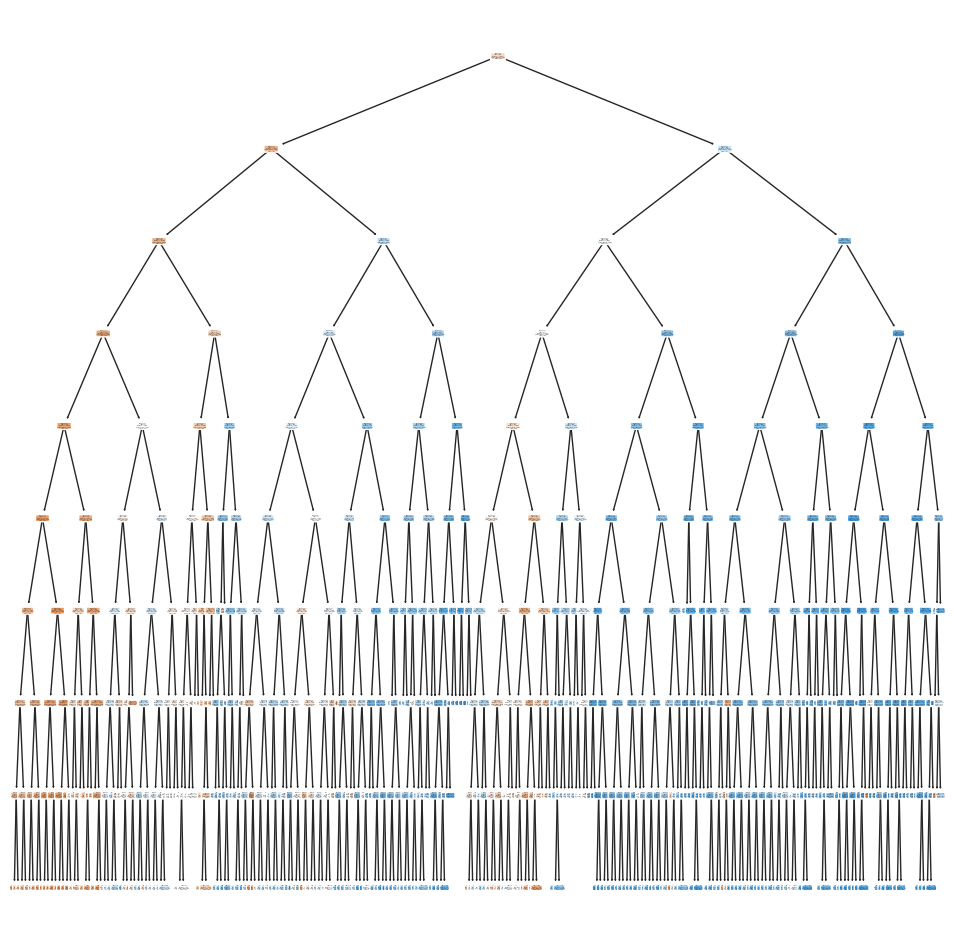

In [52]:
from sklearn.tree import plot_tree
f = plt.figure(figsize=(12,12))

plot_tree(clf, filled=True, rounded=True,  class_names=["No","Yes"])

### Prediction Accuracy Findings

From the optimised Decision Tree Model

`True Positive Rate`: The true positive rate is approximately 0.5520. This means that the model correctly identified around `55.20%` of the positive cases.

`False Positive Rate`: The false positive rate is approximately 0.1954. This indicates that the model incorrectly classified around `19.54%` of the negative cases in the test dataset as positive.

`Accuracy`: The accuracy of the model on the test dataset is approximately 0.7004 or `70.04%`. This means that the model correctly predicted the outcome 70.04% of the cases in the test dataset.

Based on these results, it can be concluded that the overall accuracy of the model is good, indicating that it is able to predict the outcome correctly for a significant portion of the test dataset.